# Analiza statystyczna zbioru danych dotyczącego cen domów w Kalifornii

## Wczytanie i przygotowanie danych

Najpierw wczytuję dane i przyjrzę się podstawowym informacjom o zbiorze danych. Wykorzystam zbiór danych o cenach domów w Kalifornii.

In [55]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [56]:
# Wczytanie danych
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

In [57]:
# Wyświetlenie pierwszych kilku wierszy danych
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Powyższy kod wczytuje dane o cenach domów w Kalifornii i tworzy DataFrame z odpowiednimi nazwami kolumn. Następnie wyświetlam pierwsze kilka wierszy danych.

## Wizualizacja zależności między zmiennymi

Aby lepiej zrozumieć dane, wykonam kilka wykresów, które pokazują zależności między wybranymi zmiennymi a ceną domów.


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

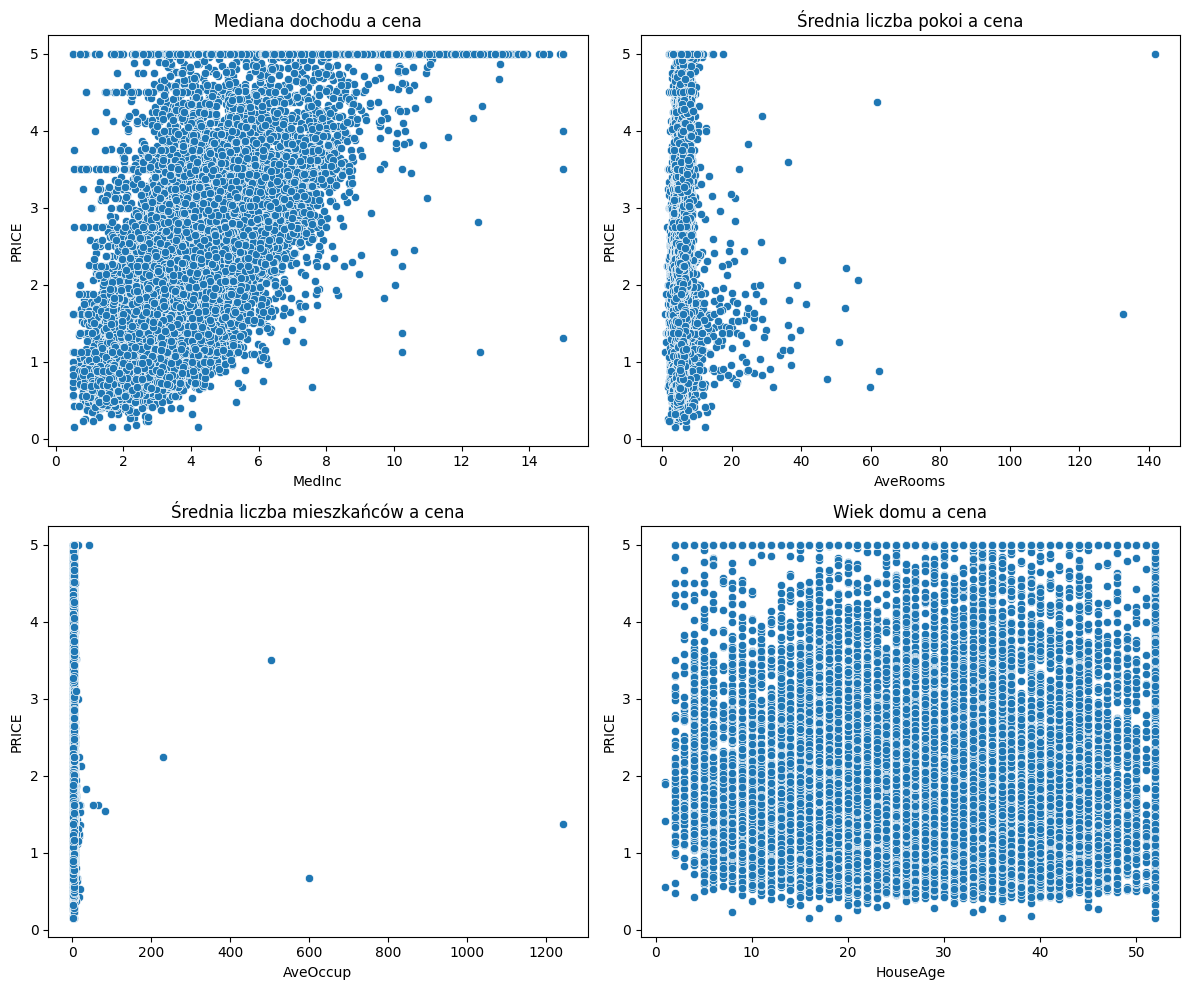

In [59]:
# Wykresy zależności między wybranymi zmiennymi a ceną domów
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='MedInc', y='PRICE', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Mediana dochodu a cena')

sns.scatterplot(x='AveRooms', y='PRICE', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Średnia liczba pokoi a cena')

sns.scatterplot(x='AveOccup', y='PRICE', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Średnia liczba mieszkańców a cena')

sns.scatterplot(x='HouseAge', y='PRICE', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Wiek domu a cena')

plt.tight_layout()
plt.show()

## Statystyki opisowe

Przeanalizuję podstawowe statystyki opisowe zbioru danych, aby uzyskać ogólne pojęcie o rozkładzie zmiennych.

In [61]:
# Statystyki opisowe
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Powyższy kod wyświetla podstawowe statystyki opisowe dla każdej zmiennej w zbiorze danych.

## Korelacja między zmiennymi

Sprawdzę korelacje między zmiennymi w zbiorze danych, aby zidentyfikować silne zależności.

In [62]:
# Macierz korelacji
correlation_matrix = df.corr()

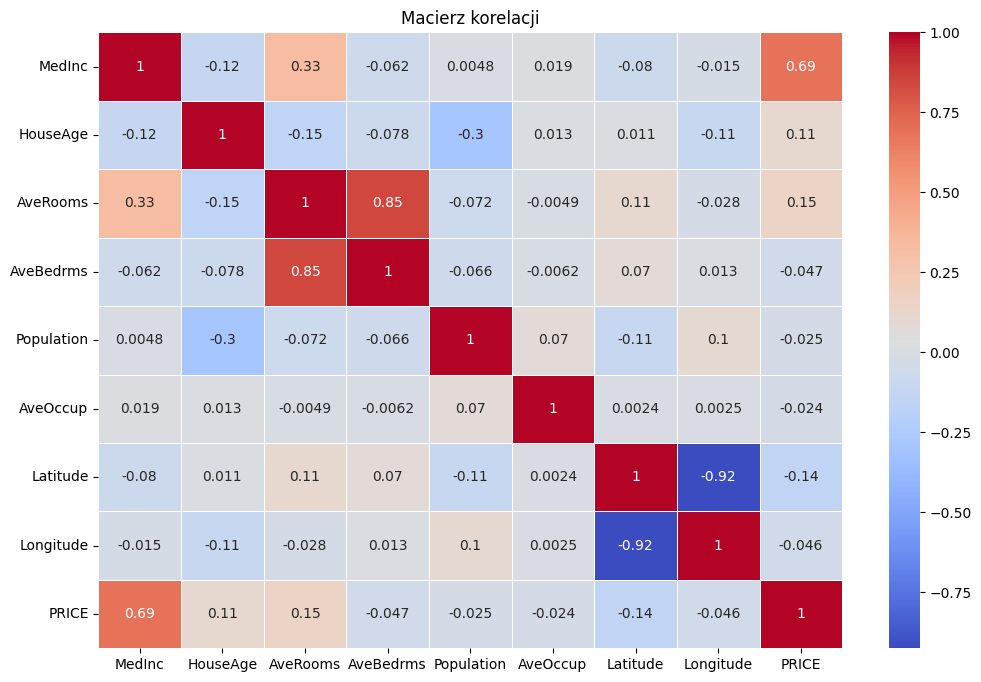

In [63]:
# Wykres korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

Powyższy kod generuje macierz korelacji oraz wykres korelacji między zmiennymi w zbiorze danych.

## Budowa prostego modelu liniowego

Zbuduję prosty model liniowy, który będzie przewidywał cenę domów na podstawie jednej zmiennej.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# Przygotowanie danych
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude']]
y = df['PRICE']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Budowa modelu liniowego
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predykcja i ocena modelu
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.6479945669253745, 0.5055020396798211)

Powyższy kod buduje model liniowy, który przewiduje cenę domów na podstawie pięciu zmiennych: mediany dochodu, wieku domu, średniej liczby pokoi, średniej liczby mieszkańców oraz szerokości geograficznej. Model jest oceniany za pomocą błędu średniokwadratowego (MSE) oraz współczynnika determinacji (R²).

### Wyniki:
- Błąd średniokwadratowy (MSE): {mse}
- Współczynnik determinacji (R²): {r2}

Model ten pokazuje, że istnieje istotna zależność między wybranymi zmiennymi a ceną domów. Wyższe dochody, wiek domu, liczba pokoi, liczba mieszkańców oraz lokalizacja geograficzna mają wpływ na cenę nieruchomości.

## Budowa co najmniej dwóch modeli liniowych i porównanie ich

Zbuduję dwa modele liniowe i porównam je pod względem dopasowania.


In [74]:
# Przygotowanie danych dla modelu 1
X1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude']]
y = df['PRICE']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [75]:
# Model 1
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

In [76]:
# Przygotowanie danych dla modelu 2
X2 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
y = df['PRICE']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [77]:
# Model 2
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

In [78]:
mse1, r2_1, mse2, r2_2

(0.6479945669253745,
 0.5055020396798211,
 0.5473476153737099,
 0.5823077951522643)

Powyższy kod buduje dwa modele liniowe: pierwszy na podstawie pięciu zmiennych (mediana dochodu, wiek domu, średnia liczba pokoi, średnia liczba mieszkańców, szerokość geograficzna), a drugi na podstawie sześciu zmiennych (dodatkowo długość geograficzna). Modele są oceniane za pomocą błędu średniokwadratowego (MSE) oraz współczynnika determinacji (R²). Porównanie tych miar pozwala wybrać lepszy model.

### Wyniki:
- Model 1 (5 zmiennych):
  - Błąd średniokwadratowy (MSE): {mse1}
  - Współczynnik determinacji (R²): {r2_1}

- Model 2 (6 zmiennych):
  - Błąd średniokwadratowy (MSE): {mse2}
  - Współczynnik determinacji (R²): {r2_2}

### Wnioski:
Model 2, który wykorzystuje sześć zmiennych, ma niższy błąd średniokwadratowy (MSE) i wyższy współczynnik determinacji (R²) w porównaniu do Modelu 1, który wykorzystuje pięć zmiennych. Oznacza to, że Model 2 lepiej wyjaśnia zmienność cen domów w Kalifornii. Dodanie zmiennej dotyczącej długości geograficznej poprawia dopasowanie modelu, co sugeruje, że lokalizacja geograficzna (zarówno szerokość, jak i długość) jest istotnym czynnikiem wpływającym na cenę domów.
